In [1]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.ez_priors
import lib.io.seeg
import lib.io.tvb
import importlib

In [2]:
bias = 20
thrshld = 200
tau = 1
wndw_len = 1024
wndw_ovrlp = 512
ei_wndw_len = 5
data_dir = 'datasets/retro/id030_bf'
meta_data_fname = 'BF_crise1P_110831B-CEX_0004.json'
raw_seeg_fname = 'BF_crise1P_110831B-CEX_0004.raw.fif'

ep_idx, Nd, N0 = lib.utils.ez_priors.comp_epindx(
    data_dir,
    raw_seeg_fname,
    meta_data_fname,
    bias=20,
    thrshld=200,
    tau=1,
    wndw_len=1024,
    wndw_ovrlp=512,
    ei_wndw_len=5)
ep_idx_keys, ep_idx_vals = zip(*ep_idx.items())
ep_idx_vals = np.array(ep_idx_vals)

Isotrak not found


('A1', 21)


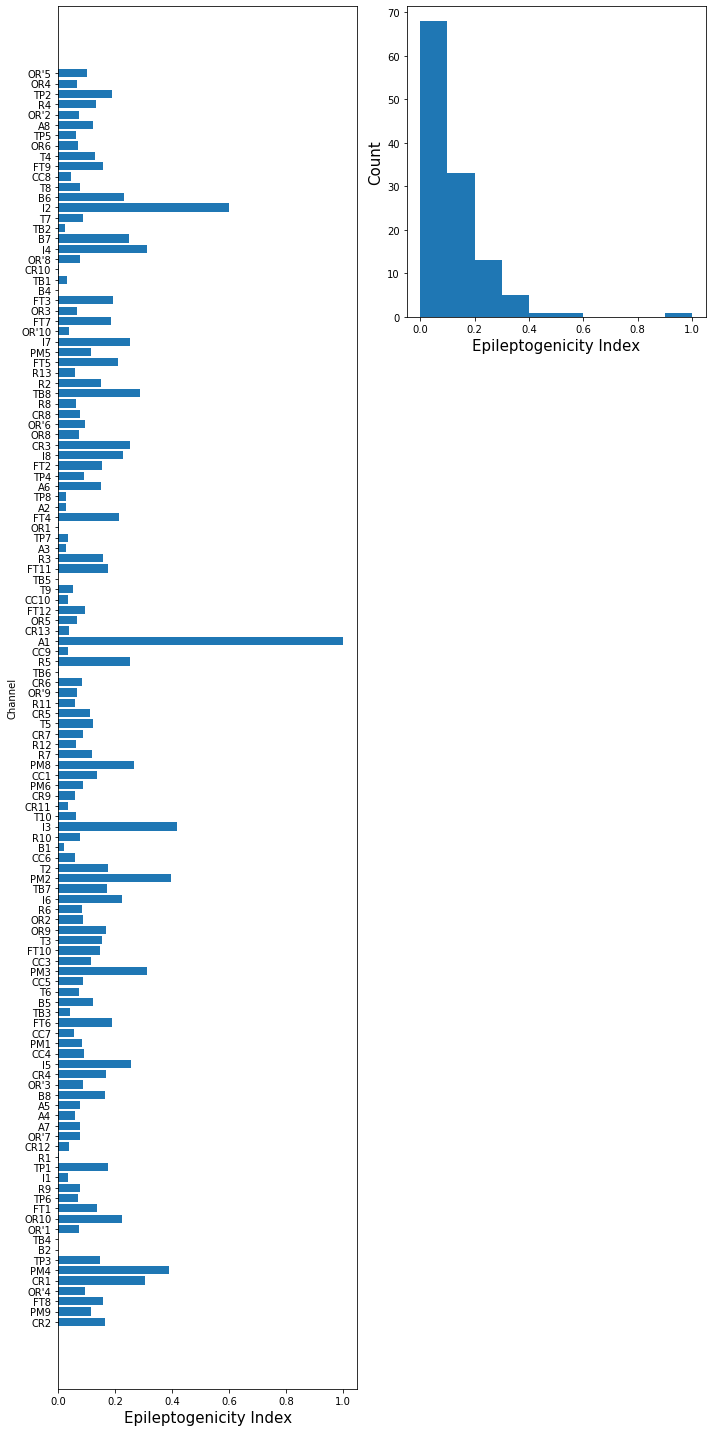

In [3]:
print(N0)
plt.figure(figsize=(10,20))
ax1 = plt.subplot2grid((4,2), (0,0), rowspan=4)
ax1.barh(np.r_[0:len(ep_idx_vals)], ep_idx_vals)
ax1.set_xlabel('Epileptogenicity Index', fontsize=15);
ax1.set_ylabel('Channel');
ax1.set_yticks(np.r_[0:len(ep_idx_keys)]);
ax1.set_yticklabels(ep_idx_keys);

ax2 = plt.subplot2grid((4,2), (0,1))
ax2.hist(ep_idx_vals)
ax2.set_ylabel('Count', fontsize=15);
ax2.set_xlabel('Epileptogenicity Index', fontsize=15);
plt.tight_layout()

In [4]:
# importlib.reload(lib.utils.ez_priors)
cntcts_file = 'datasets/retro/id030_bf/elec/seeg.xyz'
cntrs_zipfile = 'datasets/retro/id030_bf/tvb/connectivity.vep.zip'
ez_names, ez_idcs = lib.utils.ez_priors.get_ez_from_epindx(ep_idx, 0.5, cntcts_file, cntrs_zipfile, dist_prcntl=1)
print(ez_names)

['Right-Hippocampus-anterior', 'Right-Amygdala', 'Right-Caudate-nucleus', 'Right-Insula-gyri-brevi']


In [5]:
ez_hyp = np.loadtxt('datasets/retro/id030_bf/tvb/ez_hypothesis.vep.txt')

In [6]:
np.where(ez_hyp)

(array([ 82, 115, 155]),)

In [7]:
ez_idcs

[153, 155, 157, 113]